In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [2]:
# Example time series data
np.random.seed(0)
time_series = np.cumsum(np.random.randn(150))
df = pd.DataFrame(time_series, columns=['Value'])

In [3]:
# ADF Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('	%s: %.3f' % (key, value))
print("ADF Test Results:")
adf_test(df['Value'])

# KPSS Test
def kpss_test(series):
    result = kpss(series, regression='c', nlags="auto")
    print('\nKPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('	%s: %.3f' % (key, value))
print("\nKPSS Test Results:")
kpss_test(df['Value'])

ADF Test Results:
ADF Statistic: -0.585925
p-value: 0.874131
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577

KPSS Test Results:

KPSS Statistic: 0.525923
p-value: 0.035828
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


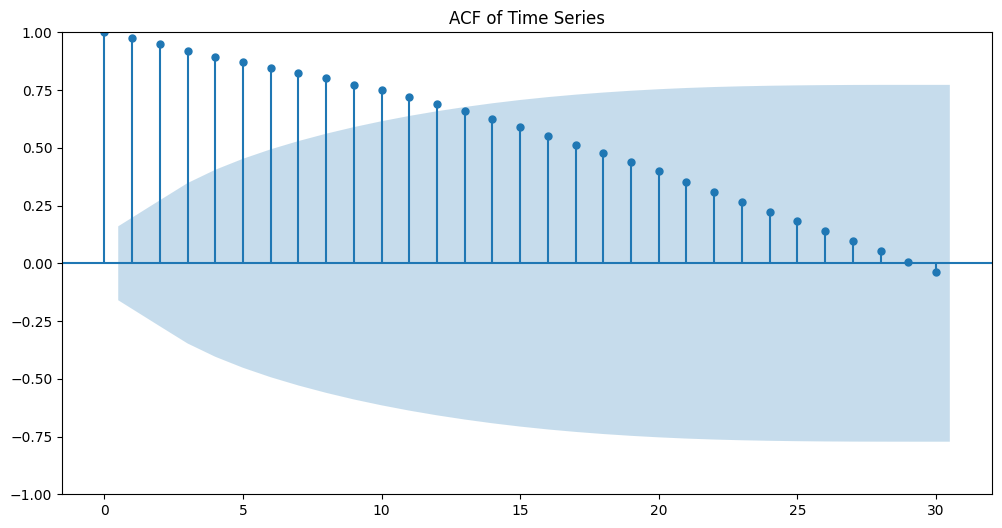

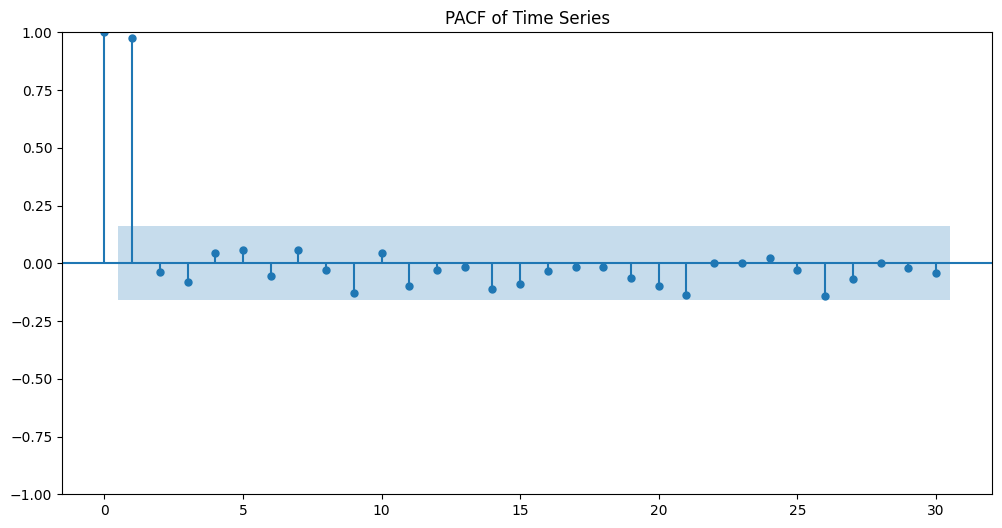

In [5]:
# ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_acf(df['Value'], lags=30, ax=plt.gca())
plt.title('ACF of Time Series')
plt.show()

print('\n')
plt.figure(figsize=(12, 6))
plot_pacf(df['Value'], lags=30, ax=plt.gca())
plt.title('PACF of Time Series')
plt.show()

# Air Passenger

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from seaborn import load_dataset
import warnings
warnings.filterwarnings('ignore')

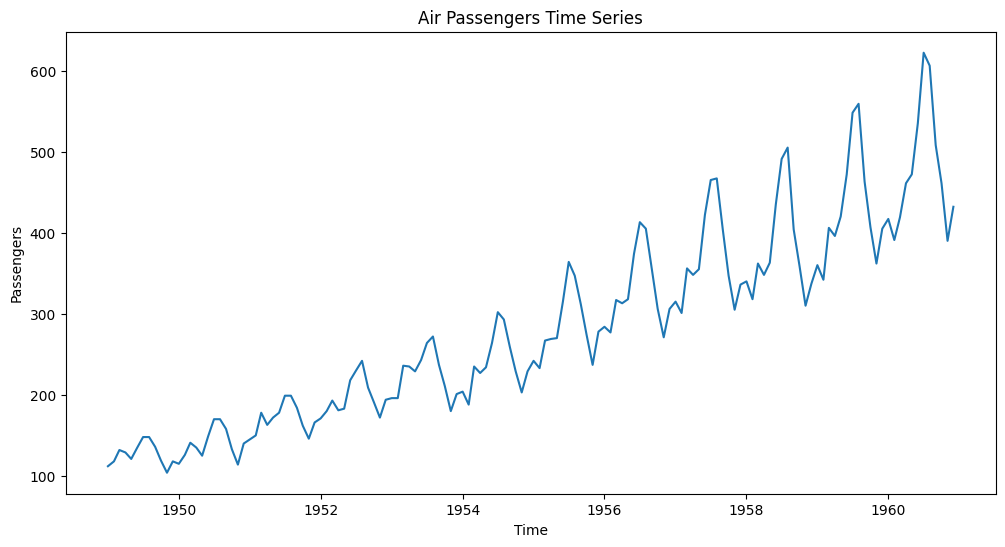

In [3]:
# Case Study: Air Passenger Data
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, index_col='Month', parse_dates=True)
# I. Data Preprocessing
# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'])
plt.title('Air Passengers Time Series')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.show()

In [84]:
data.head(3)

,Passengers,Passengers_Diff
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0


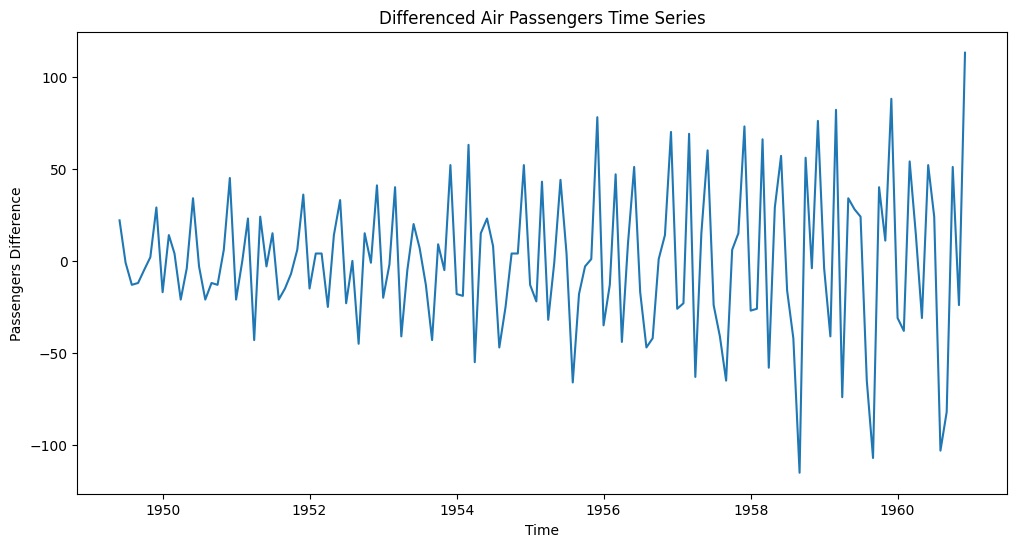

In [96]:
# II. Data Transformation
# Differencing to make the series stationary
data['Passengers_Diff'] = data['Passengers'].diff().diff()
data.dropna(inplace=True)  # Remove the first row with NaN

# Visualize differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers_Diff'])
plt.title('Differenced Air Passengers Time Series')
plt.xlabel('Time')
plt.ylabel('Passengers Difference')
plt.show()

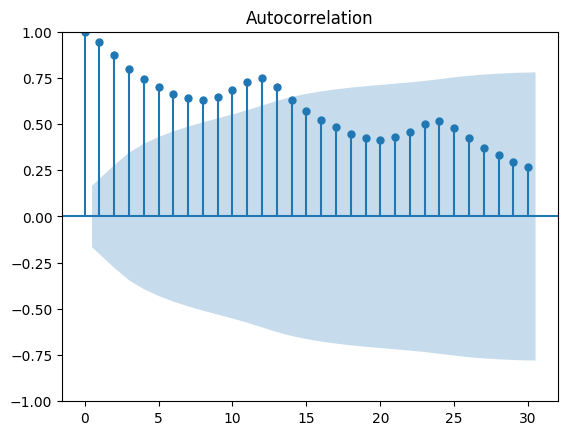

In [109]:
plot_acf(data['Passengers'], lags=30)
plt.show()

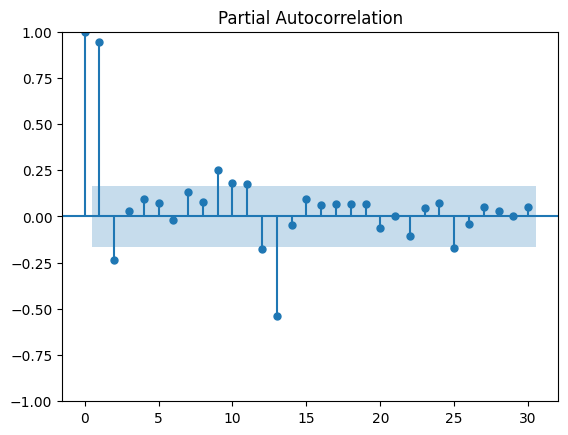

In [110]:
plot_pacf(data['Passengers'], lags=30)
plt.show()

In [98]:
# Testing for stationarity using ADF Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('	%s: %.3f' % (key, value))


print("ADF Test Results:")
adf_test(data['Passengers'])

ADF Test Results:
ADF Statistic: 0.722339
p-value: 0.990273
Critical Values:
	1%: -3.484
	5%: -2.885
	10%: -2.579


In [99]:
#Re-testing for stationarity after differencing
print("\nADF Test Results after Differencing:")
adf_test(data['Passengers_Diff'])


ADF Test Results after Differencing:
ADF Statistic: -16.201761
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.885
	10%: -2.579


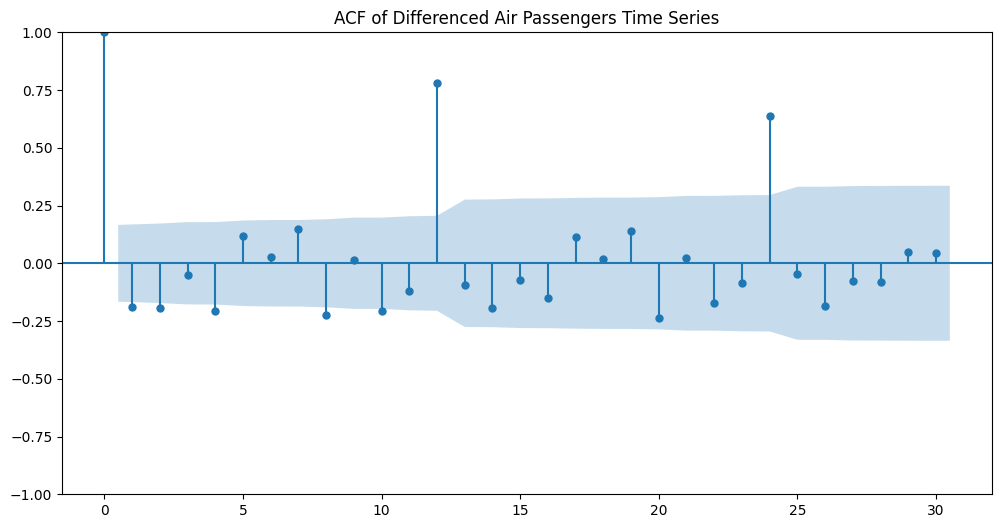

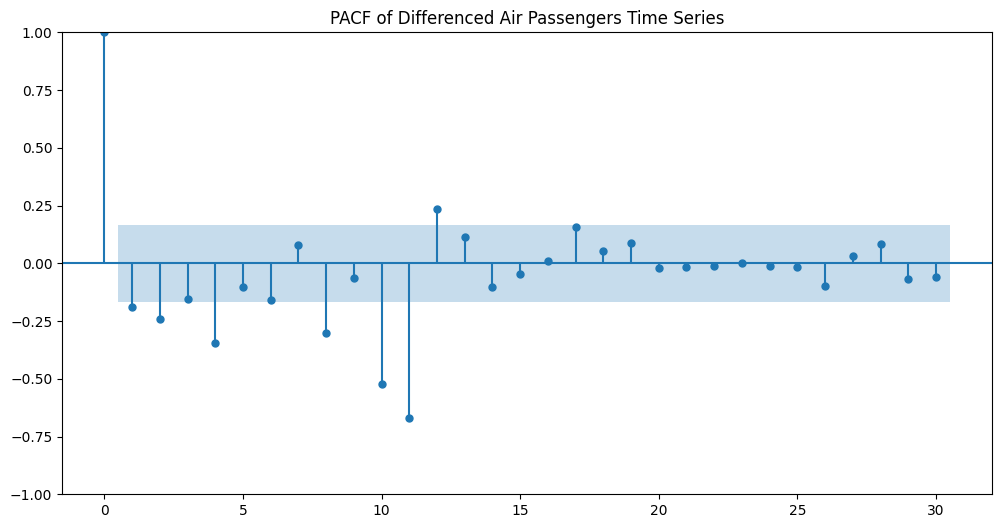

In [100]:
# ACF and PACF plots for order identification
plt.figure(figsize=(12, 6))
plot_acf(data['Passengers_Diff'], lags=30, ax=plt.gca())
plt.title('ACF of Differenced Air Passengers Time Series')
plt.show()
plt.figure(figsize=(12, 6))
plot_pacf(data['Passengers_Diff'], lags=30, ax=plt.gca())
plt.title('PACF of Differenced Air Passengers Time Series')
plt.show()

In [4]:
# III. Model Building and Training (ARIMA)
# Split data into training and testing
train_data = data['Passengers'][:-36]
test_data = data['Passengers'][-36:]

# Build ARIMA model (p, d, q) - (5,1,0) chosen based on ACF/PACF and experimentation
# O valor de "p" corresponde ao número de lags (defasagens) antes do corte significativo no gráfico PACF.
# O número de diferenciações necessárias para obter estacionariedade é representado pelo parâmetro "d".
# O valor de "q" corresponde ao número de lags antes do corte significativo no gráfico ACF.
model = ARIMA(train_data, order=(13, 2, 2), freq='MS')

# model = ARIMA(train_data, order=(0, 2, 2), freq='MS', seasonal_order=(1,2,2,12)) # similar
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  108
Model:                ARIMA(13, 2, 2)   Log Likelihood                -394.532
Date:                Mon, 28 Jul 2025   AIC                            821.065
Time:                        23:01:37   BIC                            863.680
Sample:                    01-01-1949   HQIC                           838.337
                         - 12-01-1957                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8547      0.541     -1.581      0.114      -1.915       0.205
ar.L2         -0.0385      0.988     -0.039      0.969      -1.975       1.898
ar.L3          0.0101      1.017      0.010      0.992      -1.982       2.003
ar.L4         -0.0627      0.991     -0.063      0.950      -2.006       1.880
ar.L5          0.0128      0.996      0.013      0.990      -1.940       1.965
ar.L6         -0.0238      0.980     -0.024      0.981      -1.946       1.898
ar.L7         -0.0202      0.987     -0.020      0.984      -1.954       1.914
ar.L8         -0.0771      0.990     -0.078      0.938      -2.018       1.864
ar.L9          0.0014      1.008      0.001      0.999      -1.974       1.977
ar.L10        -0.0613      0.972     -0.063      0.950      -1.967       1.844
ar.L11         0.0311      1.004      0.031      0.975      -1.938       2.000
ar.L12         0.8998      0.980      0.918      0.359      -1.021       2.821
ar.L13         0.8395      0.482      1.743      0.081      -0.104       1.783
ma.L1         -0.1749      0.556     -0.315      0.753      -1.264       0.915
ma.L2         -0.8091      0.454     -1.780      0.075      -1.700       0.082
sigma2        82.4657     14.577      5.657      0.000      53.896     111.035
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):                 1.64
Prob(Q):                              0.48   Prob(JB):                         0.44
Heteroskedasticity (H):               2.00   Skew:                             0.30
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
def find_best_arima_model(train_data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(train_data, order=order, freq='MS')
                    model_fit = model.fit()
                    if model_fit.aic < best_score:
                        best_score, best_cfg = model_fit.aic, order
                    print('ARIMA%s AIC=%.3f' % (order,model_fit.aic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
    return best_cfg

# Define the p, d and q parameters to take any value between 0 and 5
p_values = range(10, 14)
d_values = range(2, 3)
q_values = range(1, 5)

best_order = find_best_arima_model(train_data, p_values, d_values, q_values)
best_order

In [5]:
# IV. Model Evaluation
# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(data)-1)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f'\nRMSE: {rmse}')


RMSE: 24.963569737069342


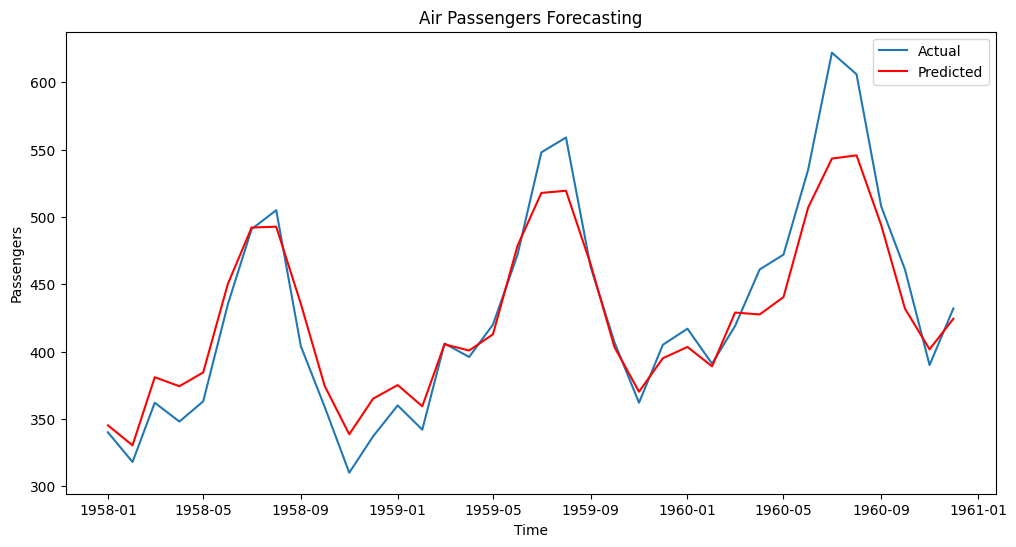

In [6]:
# Visualize predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Air Passengers Forecasting')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()


RMSE: 18.67502823475084


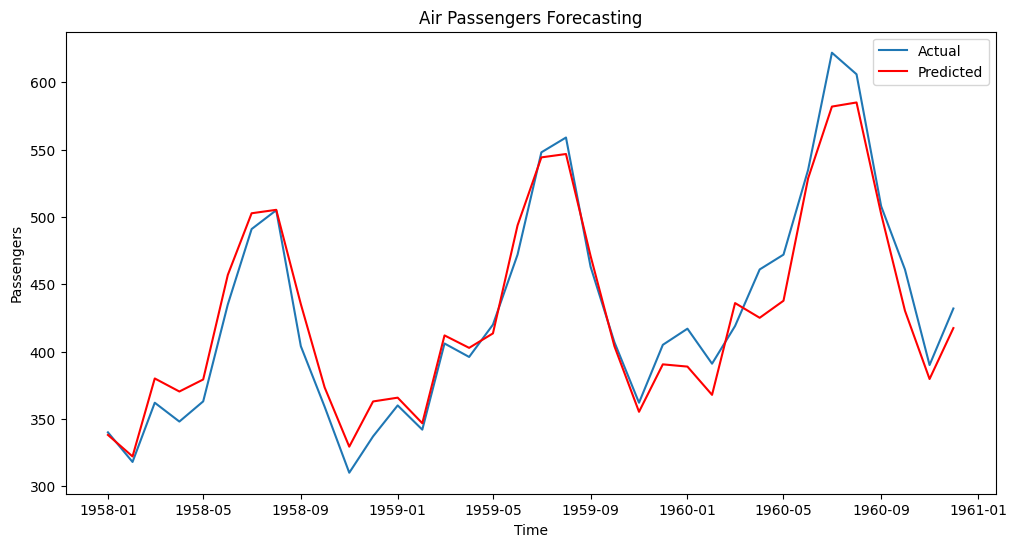

In [27]:
# Model Not differenced
# model = ARIMA(train_data, order=(13, 0, 2), freq='MS')

model = ARIMA(train_data, order=(0, 0, 0), freq='MS', seasonal_order=(1,2,2,12)) # similar
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(data)-1)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f'\nRMSE: {rmse}')

# Visualize predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Air Passengers Forecasting')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()
